In [55]:
# Import our dependencies

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv("s3://superfinalproject/Dataset.csv")


In [56]:
print(df.columns.values)

['encounter_id' 'patient_id' 'hospital_id' 'hospital_death' 'age' 'bmi'
 'elective_surgery' 'ethnicity' 'gender' 'height' 'hospital_admit_source'
 'icu_admit_source' 'icu_id' 'icu_stay_type' 'icu_type' 'pre_icu_los_days'
 'readmission_status' 'weight' 'albumin_apache' 'apache_2_diagnosis'
 'apache_3j_diagnosis' 'apache_post_operative' 'arf_apache'
 'bilirubin_apache' 'bun_apache' 'creatinine_apache' 'fio2_apache'
 'gcs_eyes_apache' 'gcs_motor_apache' 'gcs_unable_apache'
 'gcs_verbal_apache' 'glucose_apache' 'heart_rate_apache'
 'hematocrit_apache' 'intubated_apache' 'map_apache' 'paco2_apache'
 'paco2_for_ph_apache' 'pao2_apache' 'ph_apache' 'resprate_apache'
 'sodium_apache' 'temp_apache' 'urineoutput_apache' 'ventilated_apache'
 'wbc_apache' 'd1_diasbp_invasive_max' 'd1_diasbp_invasive_min'
 'd1_diasbp_max' 'd1_diasbp_min' 'd1_diasbp_noninvasive_max'
 'd1_diasbp_noninvasive_min' 'd1_heartrate_max' 'd1_heartrate_min'
 'd1_mbp_invasive_max' 'd1_mbp_invasive_min' 'd1_mbp_max' 'd1_mbp_mi

In [58]:
print(len(df))


91713


In [59]:
df2 = df[['hospital_death',
 'd1_heartrate_min', 'd1_heartrate_max',
 'd1_sysbp_min', 'd1_sysbp_max',
 'd1_diasbp_max', 'd1_diasbp_min', 'age', 'patient_id',
 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 
  
  ]].copy()

In [5]:
# This was used to get 10% of the dataset to run a quick machine learning model. 
# df2 = df2.sample(frac=0.1, replace=True, random_state=1)


In [60]:
df2.dropna(inplace=True)
X = df2.drop('hospital_death', axis=1)
X = pd.get_dummies(X)
y = df2['hospital_death'] != 1

In [61]:
X

,d1_heartrate_min,d1_heartrate_max,d1_sysbp_min,d1_sysbp_max,d1_diasbp_max,d1_diasbp_min,age,patient_id,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache
0,72.0,119.0,73.0,131.0,68.0,37.0,68.0,25312,3.0,6.0,4.0
1,72.0,118.0,67.0,159.0,95.0,31.0,77.0,59342,1.0,3.0,1.0
2,68.0,96.0,105.0,148.0,88.0,48.0,25.0,50777,3.0,6.0,5.0
3,92.0,116.0,84.0,158.0,48.0,42.0,81.0,46918,4.0,6.0,5.0
5,83.0,113.0,107.0,173.0,100.0,61.0,67.0,74489,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
91706,55.0,78.0,90.0,169.0,102.0,54.0,54.0,59223,4.0,6.0,5.0
91708,70.0,115.0,67.0,128.0,104.0,44.0,75.0,78108,4.0,6.0,5.0
91709,76.0,100.0,65.0,127.0,73.0,40.0,56.0,13486,4.0,6.0,5.0
91710,79.0,158.0,75.0,110.0,77.0,49.0,48.0,58179,3.0,6.0,4.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
   clf = GradientBoostingClassifier(n_estimators=50,
   learning_rate=learning_rate,
   max_features=5,
   max_depth=3,
   random_state=0)
   clf.fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9288983732294179
Testing Score: 0.9181240432342163


In [65]:
clf = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=3).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9233933320962454
Testing Score: 0.9189590388272951


In [66]:
feature_importances = clf.feature_importances_

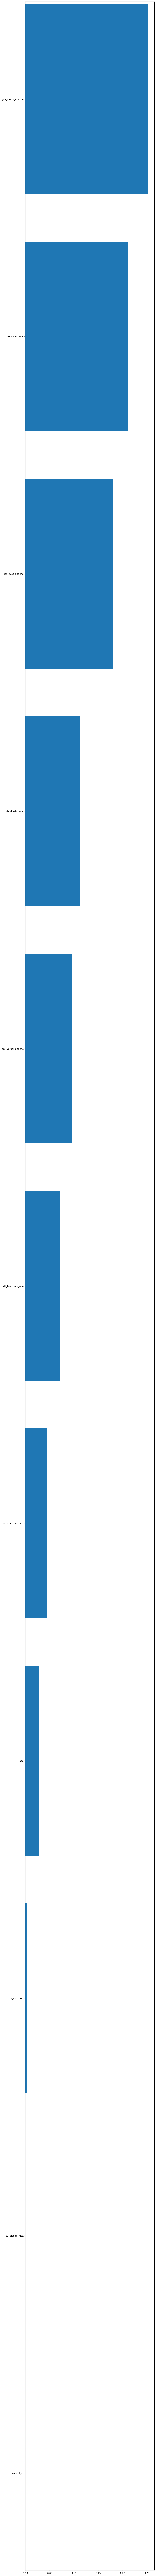

In [67]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [68]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=3, n_estimators=50,
                                                 random_state=1))

In [69]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\baseb\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [70]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9237489948660852
Testing Score: 0.9184023750985759


In [71]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9233624048988681
Testing Score: 0.9197940344203739


In [72]:
df2.to_csv('cleaned_dataset.csv')